In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sb                      # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import statistics as st
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("data (1) (3).csv") # read_csv: inbuilt function of pandas to read files

In [2]:
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


In [3]:
df.tail(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [4]:
# to see the shape of the data
df.shape

(10692, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
# Qualitative
a = df.select_dtypes(exclude='object')  
a.head(2)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973


In [7]:
# Quantitative
b =  df.select_dtypes(include='object')  
b.head(2)

,city,animal,furniture
0,São Paulo,acept,furnished
1,São Paulo,acept,not furnished


In [8]:
a_lst = list(a.columns)
b_lst = list(b.columns)
table = [a_lst,b_lst]
print(tabulate({'Categorical':b_lst,
                 'Continuous':a_lst}, headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


##### Checking the missing values

In [9]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

There are no missing values in this data.

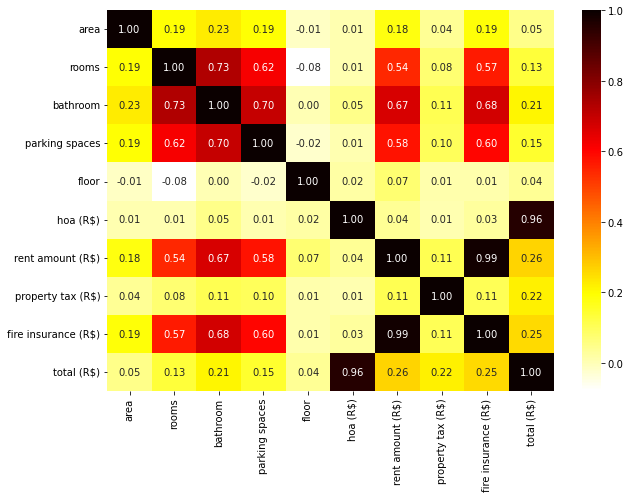

In [11]:
# checking that is there any correlation between two colmns
corr_df=df.corr()
plt.figure(figsize=(10,7))
sb.heatmap(corr_df,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

##### Interpretation:
* From the heatmap we can see that there is a strong correlation between fire insurance and rent amount.
* And between total and hoa.

# Univariate Analysis 

In [17]:
b.columns

Index(['city', 'animal', 'furniture'], dtype='object')

### City

In [11]:
data=df['city'].value_counts()
data

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

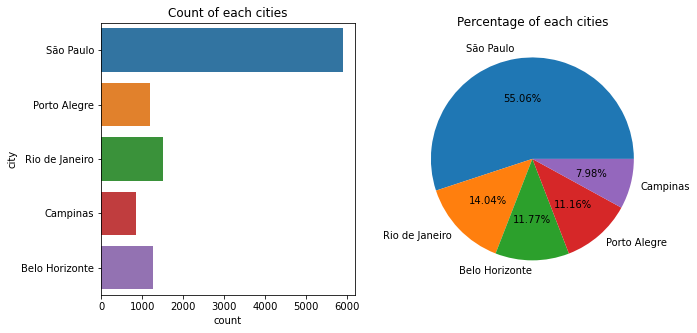

In [12]:

fig, ax = plt.subplots(1, 2, figsize = (10,5))
sb.countplot(y = df["city"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each cities")  
ax[1].set_title('Percentage of each cities')
plt.show()

##### Interpretation:
* São Paulo has the highest count of house. 

### furniture

In [13]:
data=df['furniture'].value_counts()
data

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

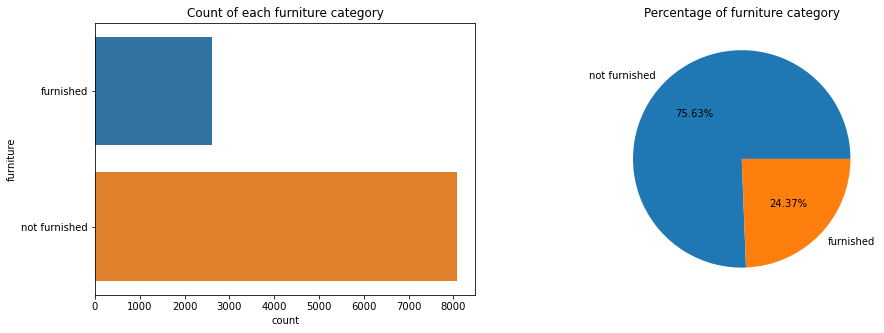

In [14]:

fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["furniture"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each furniture category")  
ax[1].set_title('Percentage of furniture category')
plt.show()

##### Interpretation:
* There are high count of non furnished house in Furniture column.

### Area

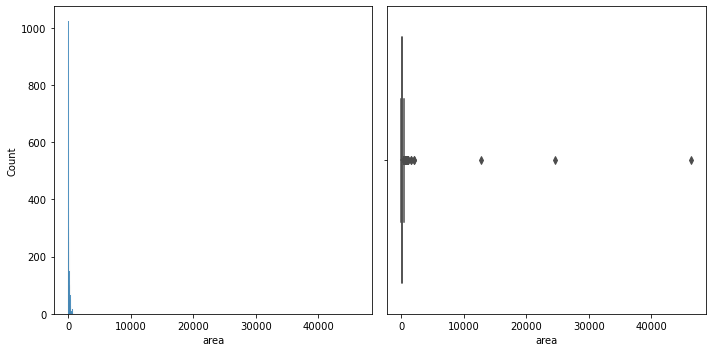

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.histplot(x=df['area'],ax=ax[0])
sb.boxplot(x=df['area'],color='cyan')
plt.tight_layout()

There are uneven distribution in the data so we need to normalize it.

In [6]:
df.area.describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

In [7]:
df.area.describe([0.95])

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
50%         90.000000
95%        400.000000
max      46335.000000
Name: area, dtype: float64

In [17]:
df1 = df[df['area'] < df['area'].quantile(0.95)] # getting the datas below 95%

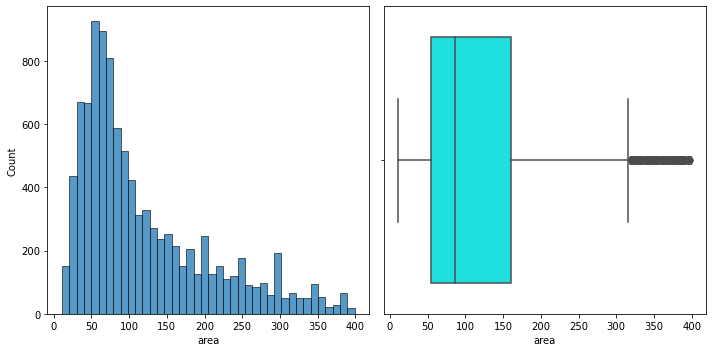

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.histplot(x=df1['area'],ax=ax[0])
sb.boxplot(x=df1['area'],color='cyan')
plt.tight_layout()

##### Interpretation:
* Most of the places offer area of appraximaltely range between 50 and 150.

### Rooms

In [19]:
data=df.rooms.value_counts()
data

3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64

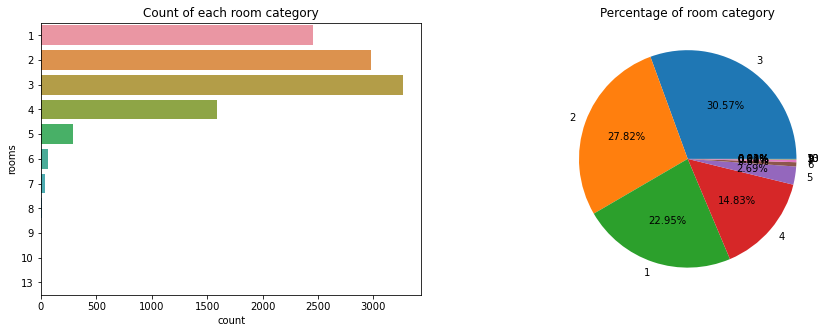

In [20]:

fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["rooms"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each room category")  
ax[1].set_title('Percentage of room category')
plt.show()

##### Interpretatiion:
* The Most of the cities offering 3 rooms.
* The category 2 , 3 rooms are almost equal.


### Bathroom

In [21]:
data=df.bathroom.value_counts()
data

1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64

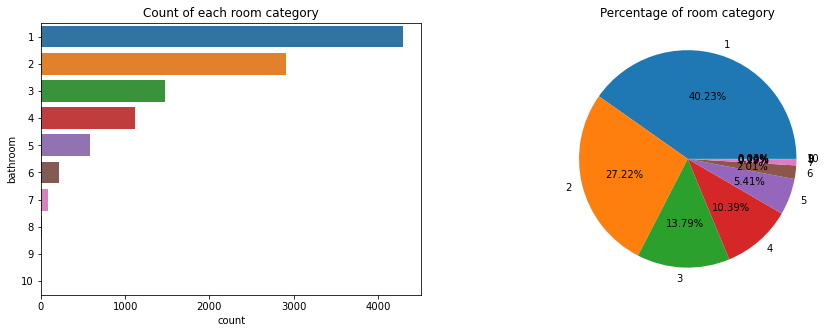

In [22]:

fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["bathroom"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each room category")  
ax[1].set_title('Percentage of room category')
plt.show()

##### Interpretation:
* Most of the places having houses containing one bathroom.

In [23]:
df.rename(columns={'parking spaces':'parking_spaces'},inplace=True)

### Parking spaces

In [24]:
data=df['parking_spaces'].value_counts()
data

1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: parking_spaces, dtype: int64

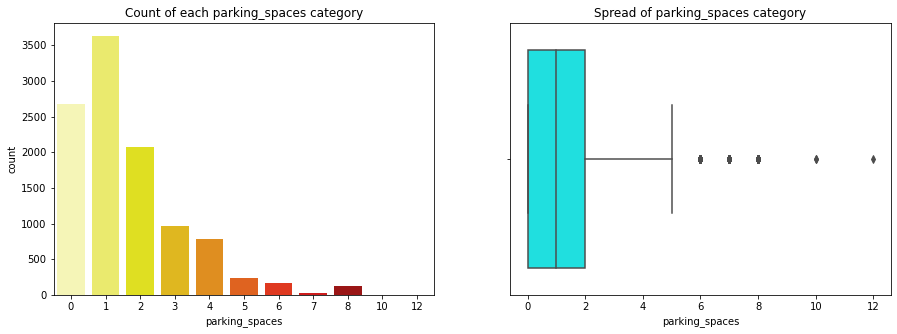

In [25]:

fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(x = df["parking_spaces"],palette='hot_r',ax=ax[0])
sb.boxplot(x=df["parking_spaces"],color='cyan',ax=ax[1])
ax[0].set_title("Count of each parking_spaces category")  
ax[1].set_title('Spread of parking_spaces category')
plt.show()

##### Interpretation:
* Most number of houses having 1 parking place in all cities.
* Most of the houses offering 1,2 parking places in among all cities.

### Rent

In [26]:
df['total (R$)'].describe()

count    1.069200e+04
mean     5.490487e+03
std      1.648473e+04
min      4.990000e+02
25%      2.061750e+03
50%      3.581500e+03
75%      6.768000e+03
max      1.120000e+06
Name: total (R$), dtype: float64

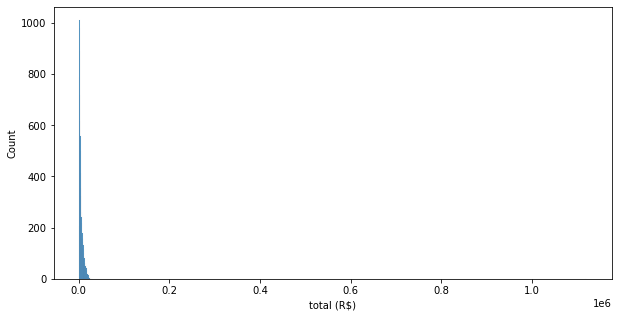

In [27]:
fig, ax = plt.subplots(figsize = (10, 5))
sb.histplot(x=df['total (R$)'])
plt.show()

Getting the datas below 95%.

In [72]:
df1 = df[df['total (R$)'] < df['total (R$)'].quantile(0.95)] # getting the datas below 95%

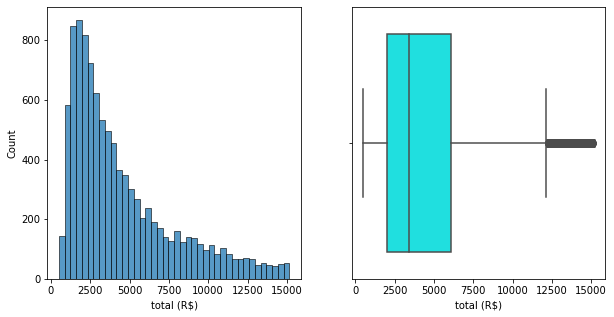

In [76]:
fig, ax = plt.subplots(1,2,figsize = (10, 5))
sb.histplot(x=df1['total (R$)'],ax=ax[0])
sb.boxplot(x=df1['total (R$)'],color='cyan')
plt.show()

##### Interpretation:
* Most of the house total rent ranges between approx 2000 and 6000.

In [56]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# Bivariate Analysis

### City vs Animal

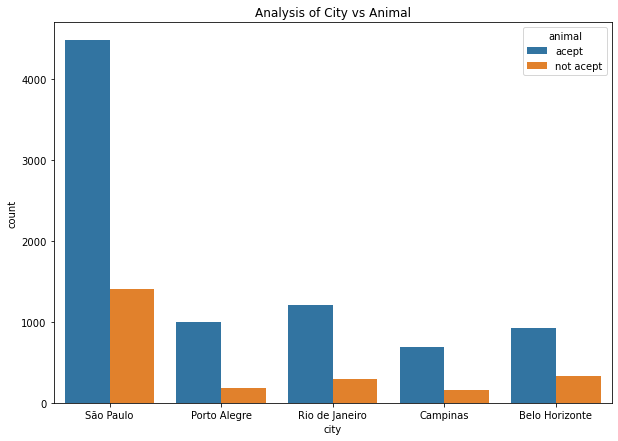

In [81]:
plt.figure(figsize=(10,7))
sb.countplot(x='city',hue='animal',data=df)
plt.title('Analysis of City vs Animal')
plt.show()

##### Interpretation:
* São Paulo is the city who are having the hight count in not acepting the animals.

### Rooms vs City

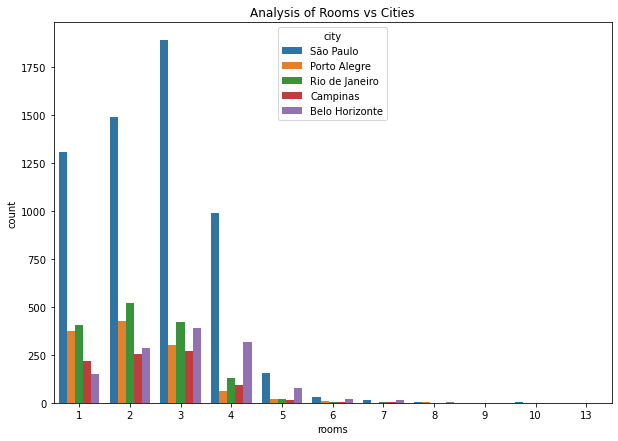

In [93]:
plt.figure(figsize=(10,7))
sb.countplot(x='rooms',hue='city',data=df)
plt.title('Analysis of Rooms vs Cities')
plt.show()

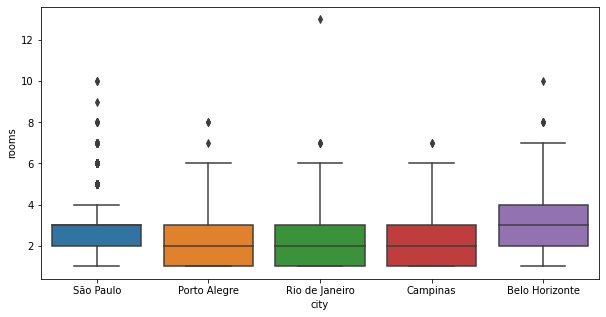

In [92]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df.city,y=df.rooms,data=df)
plt.show()

###### Interpretation:
* From the above plot we can see that São Paulo is providing high in all room category.
* From the Above boxplot we can see that Belo Horizonte providing wide variety of rooms.
* Except Belo Horizonte all are right skewed.

### City vs Parking space

In [83]:
data=df[(df['parking_spaces']<=6)]

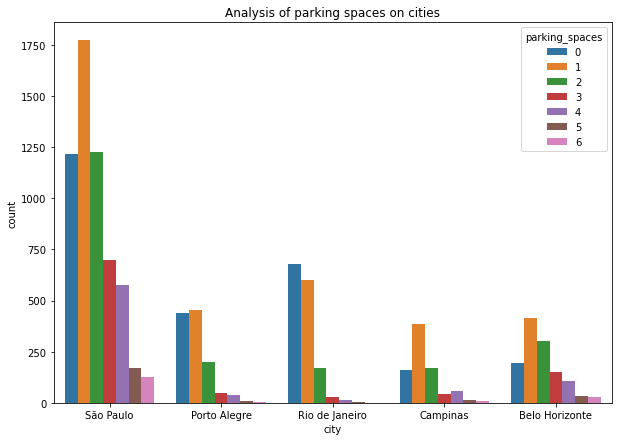

In [95]:
plt.figure(figsize=(10,7))
sb.countplot(x='city',hue='parking_spaces',data=data)
plt.title('Analysis of parking spaces on cities')
plt.show()

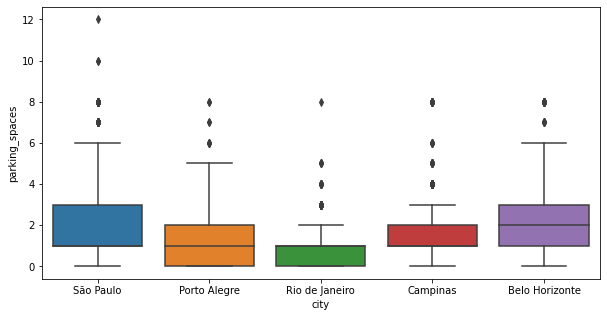

In [94]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df.city,y=df.parking_spaces,data=df)
plt.show()

##### Interpretation:
* From the above graph we can see that parking space category of all cities.
* São Paulo is highest in all parking space category.
* São Paulo and Belo Horizonte providing wide variety of parking space.

### City vs Furniture

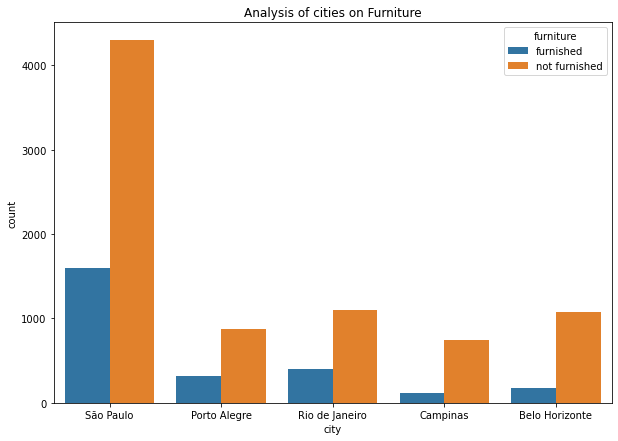

In [99]:
plt.figure(figsize=(10,7))
sb.countplot(x='city',hue='furniture',data=df)
plt.title('Analysis of cities on Furniture')
plt.show()

##### Interpretation:
* São Paulo providing the high number of furnished house and also the non furnished house.
* Campinas providing the low number of furnished house among all other.
* Every cites have large number of non furnished house.

### City vs Total rent

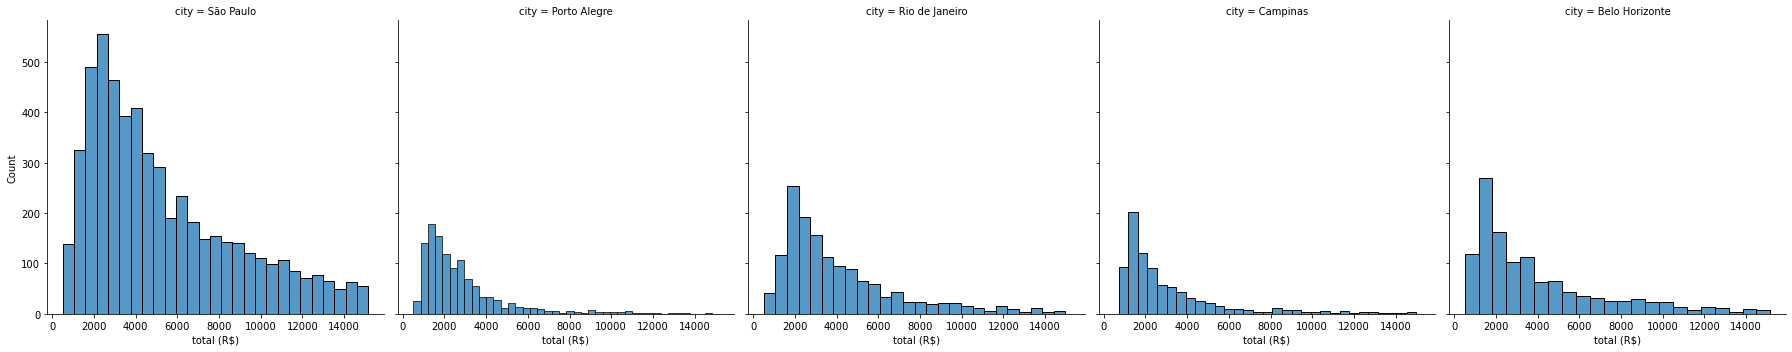

In [102]:
data=df[(df['total (R$)']<=df['total (R$)'].quantile(0.95))]
g=sb.FacetGrid(data,col='city',height=5)
g.map(sb.histplot,'total (R$)')
plt.show()

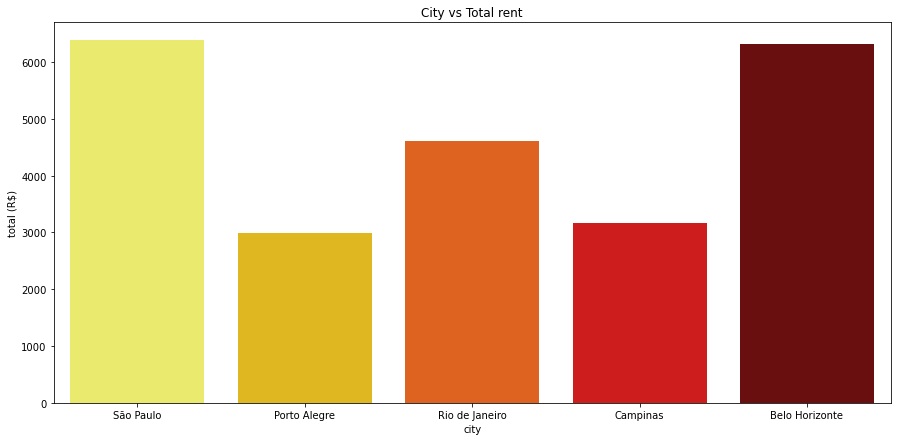

In [28]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "city", y = 'total (R$)', data = df,palette='hot_r',ci=False)
ax.set_title('City vs Total rent')
plt.show()

##### Interpretation:
* From this bar graph we can see that the maximum total rent rate for Porto Alegre and Campinas is approx $3000 only.
* i.e) Porto Alegre and Campinas providing houses with lowest average rent rate including all taxes.

### City vs Area

In [104]:
data = df[df['area'] < df['area'].quantile(0.95)]

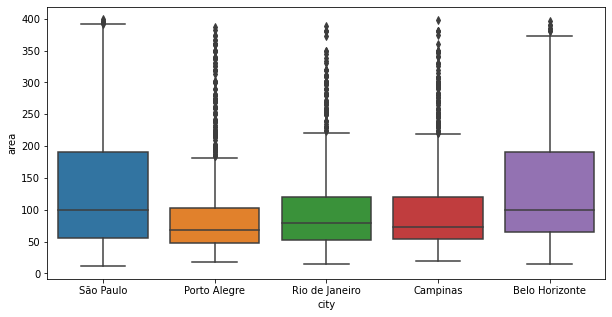

In [105]:
plt.figure(figsize=(10,5))
sb.boxplot(x=data.city,y=data.area,data=data)
plt.show()

##### Interpretation:
* From the above graph we can see that Sao Paulo and Belo Horizonte provides the wide variety area sizes.
* Porto Alegre provides less amount of area.

# Multivariant Analysis

## Relation between City,Total rent,Animal

##### 1) City wise checking the rent whose accepting the animal.

In [29]:
df1 = df[df['total (R$)'] < df['total (R$)'].quantile(0.95)]

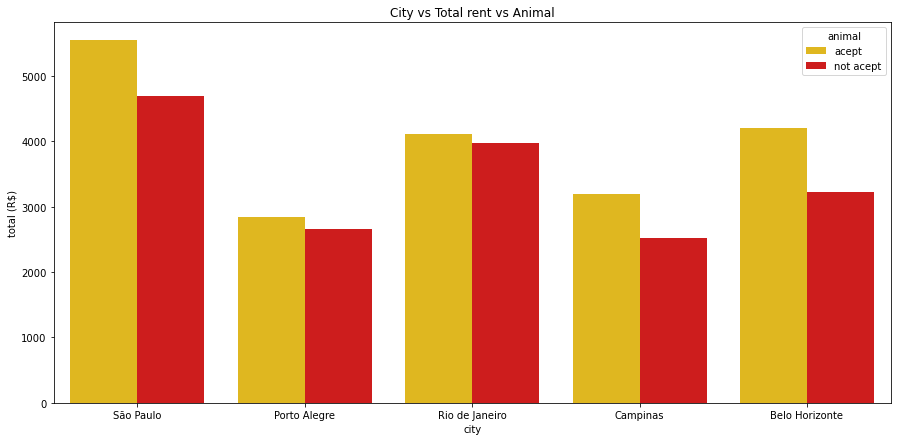

In [30]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "city", y = 'total (R$)',hue = 'animal', ci=False,data = df1,palette='hot_r')
ax.set_title('City vs Total rent vs Animal')
plt.show()

##### Interpretation:
* Sao Paulo has the highest animal accept rate than compared to other and it also has the house with wide variety of range.
* Belo Horizonte has the second highest animal accepttance rate.
* Belo horizonte also has the highest non acceptance rate so it also has the house with low rent also.
* Porto Alegre and Campinas has the lowest acceptance rate but the average rent values are lower than compared to others.


##### 2) Relation between rent vs animals.

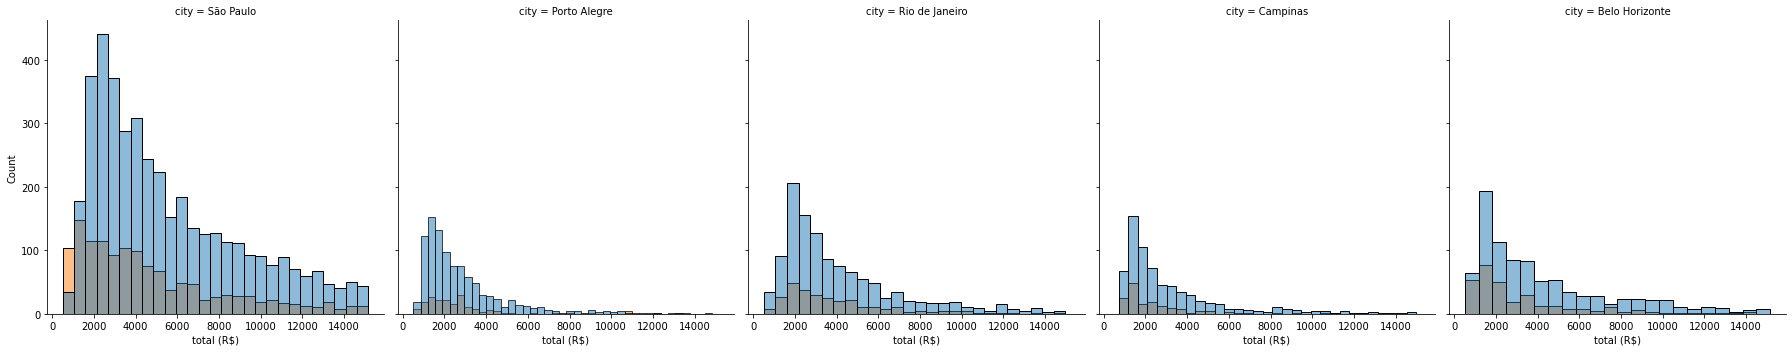

In [32]:
data=df[(df['total (R$)']<=df['total (R$)'].quantile(0.95))]
g=sb.FacetGrid(data,col='city',height=5)
g.map(sb.histplot,'total (R$)',hue='animal',data=data)
plt.show()

##### Interpretation:
* Animals affecting the total rent price.

##### 3) Relation between rent amount and fire insurance.

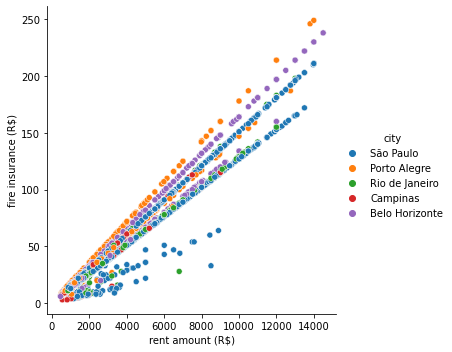

In [139]:
sb.relplot(x='rent amount (R$)',y='fire insurance (R$)',hue='city',data=data)
plt.show()

##### Interpretation:
* From the above graph we can see that there is strong positive correlation between fire insurance and rent amount.
* In everycity the houses which have high fire insurance amount surely it will have high rent amount.
* When the fire insurance rate increases the rent amount also increases.

### Relation between City,Total rent,furniture

##### 1) Relation between Total rent vs the Furniture

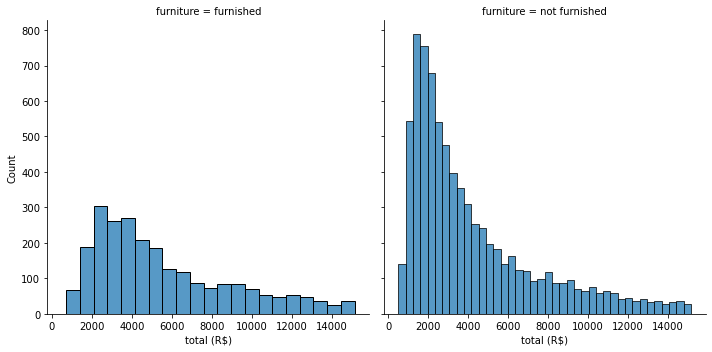

In [141]:
g=sb.FacetGrid(data,col='furniture',height=5)
g.map(sb.histplot,'total (R$)')
plt.show()

##### Interpretation:
* From the above graph we can see that count of furnished is less in all cities.
* We can see that Furnished house rent is slightly higher than compared to non furnished house.

##### 2) Relation between City,Total rent,furniture

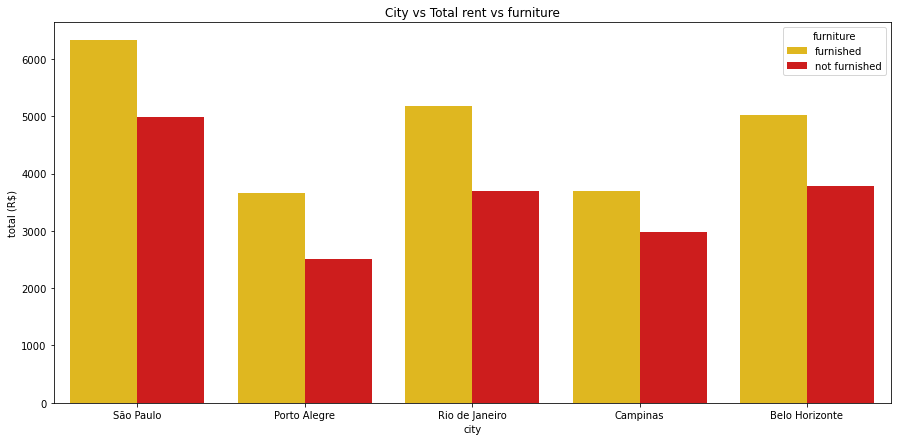

In [33]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "city", y = 'total (R$)',hue = 'furniture',ci=False, data = data,palette='hot_r')
ax.set_title('City vs Total rent vs furniture')
plt.show()

##### Interpretation:
* Sao Paulo has the highest furnished houses and the average rent is above 6000.
* Porto Alegre and Campinas has the less amount of furnished houses and less amount of non furnished house.
* Belo Horizonte has the second highest furnished houses
* But for Porto Alegre and Campinas the average rent for furnished house is approx 3500.
* We already know that Porto Alegre and Campinas has the lowest average rent amount than compared to others.

In [158]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# Relation between City,Total rent,parking space

##### 1) Check that the parking space affects the total rent.

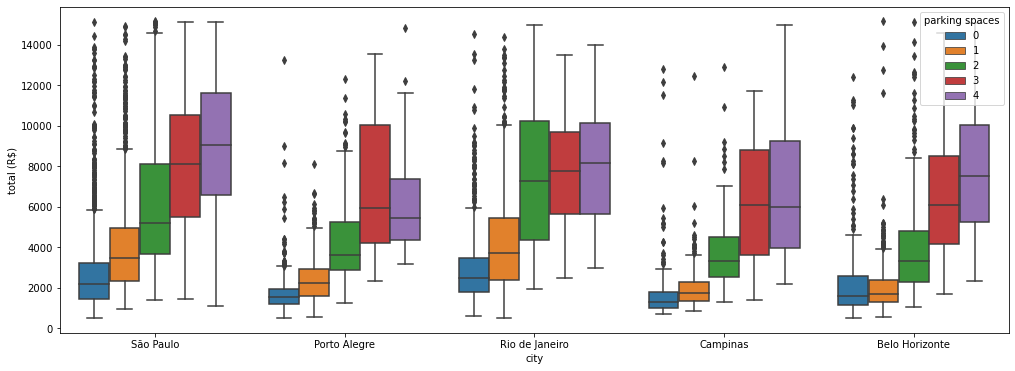

In [174]:
data1=data[(data['parking spaces']<5)]
plt.figure(figsize=(17,6))
sb.boxplot(x=data1.city,y=data1['total (R$)'],hue='parking spaces',data=data1)
plt.show()

##### Interrpretation:
* From the above boxplots we can see that when the parking spaces increases the rent amount also increases.
* For eg) in Sao paulo when the parking spaces the rent amount  also increases

##### 2) Relation between City,Total rent,parking space

In [175]:
pivot=pd.pivot_table(data1,index='city',values='total (R$)',columns='parking spaces',aggfunc='mean')
pivot

parking spaces,0,1,2,3,4
city,,,,,
Belo Horizonte,2505.778378,2101.400000,4036.275168,6567.699301,7825.449438
Campinas,1939.379747,1968.020672,3737.694118,6229.372093,7014.763636
Porto Alegre,1734.251152,2405.689427,4273.247475,6962.860465,6341.363636
Rio de Janeiro,2957.702663,4319.631134,7569.424658,7853.318182,8266.900000
São Paulo,2806.942548,4026.319705,6088.188295,8208.534622,9036.107477


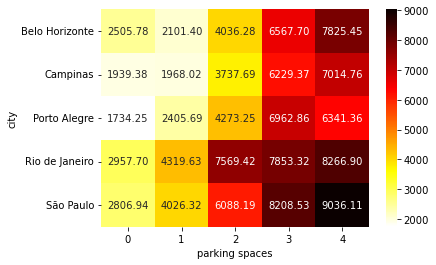

In [176]:
sb.heatmap(pivot,annot=True,fmt='.2f',cmap='hot_r',cbar=True) # fmt -format,c_map - change the color
plt.show()

##### Interpretation:
* In porto Alegre we can see that it has the lowest mean rent for highest parking spaces.
* In above we also saw that Porto Alegre the average rent amount is low than compared to others.
* Second lowest capinas and third is Belo Horizonte.
* Sao Paulo has the highest rent amount than compared to alll cities.
* Now Sao Paulo can be consider as the expensive city.  


# Relation between City,Total rent,rooms

In [177]:
pivot=pd.pivot_table(data,index='city',values='total (R$)',columns='rooms',aggfunc='mean')
pivot

rooms,1,2,3,4,5,6,7,8,9,10
city,,,,,,,,,,
Belo Horizonte,1804.493243,1972.683099,3345.127937,6534.644599,7525.106061,8236.555556,7698.400000,8098.00,NaN,6050.0
Campinas,1747.334862,1917.636364,3782.115242,6422.670455,8734.000000,5210.000000,8339.000000,NaN,NaN,NaN
Porto Alegre,1761.678284,2184.340426,4060.880137,5631.898305,7114.681818,5395.625000,6501.000000,8825.50,NaN,NaN
Rio de Janeiro,2397.455224,3464.998077,5384.763682,7817.376147,8433.769231,9585.000000,10220.000000,NaN,NaN,NaN
São Paulo,3137.803831,3699.120572,6347.302036,9063.635309,8940.517857,8442.714286,8779.733333,10451.75,12780.0,10743.0


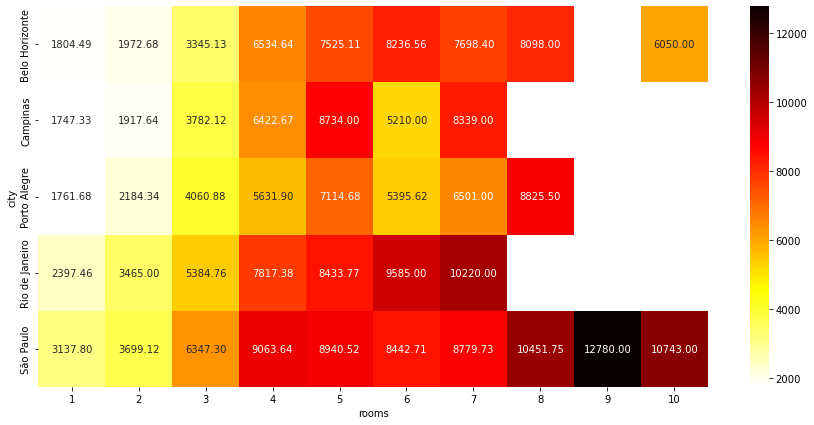

In [178]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.heatmap(pivot,annot=True,fmt='.2f',cmap='hot_r',cbar=True) # fmt -format,c_map - change the color
plt.show()

##### Interpretation:
* In Belo Horizone we can see that it has the lowest mean rent for houses having large number of rooms.
* Porto Alegre and Campinas does have houses with rooms greater than 8.
* From the above we also see that Belo Horizone has the second lowest rent with max parking spaces.
* Sao Paulo has the highest rent amount than compared to all cities.
* Now Sao Paulo can be consider as the expensive city.  
* Porto Alegre is best for 7 rooms,campinas is best for 6 rooms.

#### Conclusion:
* São Paulo has the highest count of house.
* There are high count of non furnished house in Furniture column.
* Most of the places offer area of appraximaltely range between 50 and 150.The Most of the cities offering 3 rooms.
* Most of the house total rent ranges between approx 2000 and 6000.
* São Paulo is providing high in all room category.Belo Horizonte providing wide variety of rooms.
* São Paulo and Belo Horizonte providing wide variety of parking space.
* Maximum total rent rate for Porto Alegre and Campinas is approx $3000 only.
* Belo Horizonte has the second highest animal accepttance rate Porto Alegre and Campinas has the lowest acceptance rate but the average rent values are lower than compared to others.
* Belo Horizonte has the second highest furnished houses But for Porto Alegre and Campinas the average rent for furnished house is approx 3500.
* In porto Alegre we can see that it has the lowest mean rent for highest parking spaces.In above we also saw that Porto Alegre the average rent amount is low than compared to others.Second lowest capinas and third is Belo Horizonte.
* In Belo Horizone we can see that it has the lowest mean rent for houses having large number of rooms.
* So we can choose houses in Porto Alegre,Campinas,Belo Horizone
* I my prespective "Belo Horizonte" is good.

##### Conclusion:
* São Paulo has the highest count of house.There are high count of non furnished house in Furniture column.
* Most of the places offer area of appraximaltely range between 50 and 150.The Most of the cities offering 3 rooms
* Most of the house total rent ranges between approx 2000 and 6000.
* São Paulo and Belo Horizonte providing wide variety of parking space and rooms.
* Maximum total rent rate for Porto Alegre and Campinas is approx $3000 only.
* In porto Alegre we can see that it has the lowest mean rent for highest parking spaces.In above we also saw that Porto Alegre the average rent amount is low than compared to others.Second lowest capinas and third is Belo Horizonte.
* In Belo Horizone we can see that it has the lowest mean rent for houses having large number of rooms.
* So we can choose houses in Porto Alegre,Campinas,Belo Horizone
* I my prespective "Belo Horizonte" is good.


##### São Paulo,Rio De Janeiro:
* São Paulo,Rio De Janeiro are expensive and the persons living in the city want to change their cities.

#####  Belo Horizonte:
* Belo Horizonte has the second highest animal acceptance rate.
* Belo Horizonte had houses with wide range of rooms
* It has the wide variety of parking spaces
* Belo Horizonte provides the wide variety area sizes.
* Belo Horizonte is best for houses having rooms 2,3,8,10.

#####  Porto Alegre:
* Porto Alegre has highest animal acceptance rate than campinas.
* Has more furnished house than  Belo Horizonte and Campinas.
* Houses with lowest average rent.
* But when the number of rooms increses the rent also increses highly in porto alegre
* Porto Alegre is best for houses having rooms with 1,2.

#####  Campinas:
* Campinas has the highest animal accepantance rate than  Porto Alegre,Belo Horizonte.
* It doesnt providing wide variety of parking spaces.
* Parking spaces rent is low when compared to Porto algre
* Campinas is best for houses having rooms with 1,2,3.
